# Logistic regression for binary classification

## import libraries

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

## load data

In [3]:
directory_data  = '/Users/lyuwan-u/Desktop/2021-2/assignment-machine-learning-project/assignment03'
filename_data   = 'assignment_03_data.npz'
data            = np.load(os.path.join(directory_data, filename_data))

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training image :', x_train.shape[0])
print('height of training image :', x_train.shape[1])
print('width of training image :', x_train.shape[2])
print('*************************************************')
print('number of testing image :', x_test.shape[0])
print('height of testing image :', x_test.shape[1])
print('width of testing image :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (10000, 28, 28)
size of y_train : (10000,)
*************************************************
size of x_test : (1800, 28, 28)
size of y_test : (1800,)
*************************************************
number of training image : 10000
height of training image : 28
width of training image : 28
*************************************************
number of testing image : 1800
height of testing image : 28
width of testing image : 28
*************************************************


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## vectorize image data

In [16]:
vector_x_train  = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vector_x_test   = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print(vector_x_train.shape)
print(vector_x_test.shape)


(10000, 784)
(1800, 784)


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## index for each class

In [70]:
index_train_0 = [i for i in range(len(y_train)) if y_train[i]==0]
index_train_1 = [i for i in range(len(y_train)) if y_train[i]==1]

index_test_0 =  [i for i in range(len(y_test)) if y_test[i]==0]
index_test_1 =  [i for i in range(len(y_test)) if y_test[i]==1]

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## plot data

In [31]:
def plot_data_grid(data, index_data, nRow, nCol):

    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [44]:
nRow    = 2
nCol    = 4
nPlot   = nRow * nCol

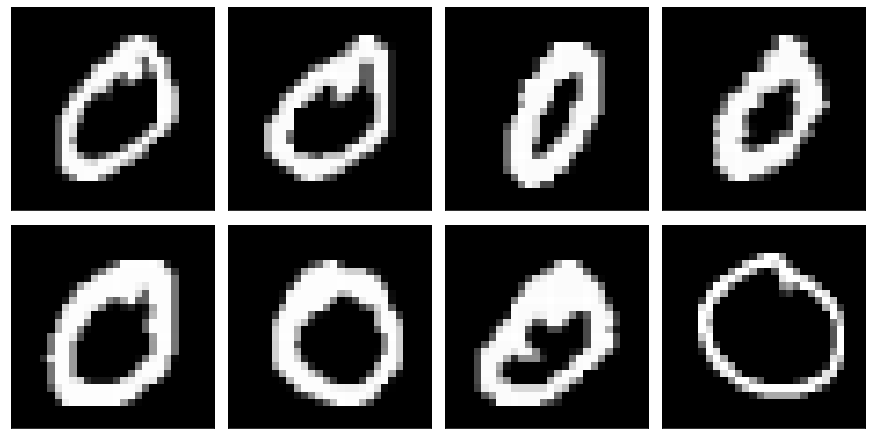

In [45]:

index_data_0 = np.array(range(nPlot))
plot_data_grid(x_train, index_data_0, nRow, nCol)

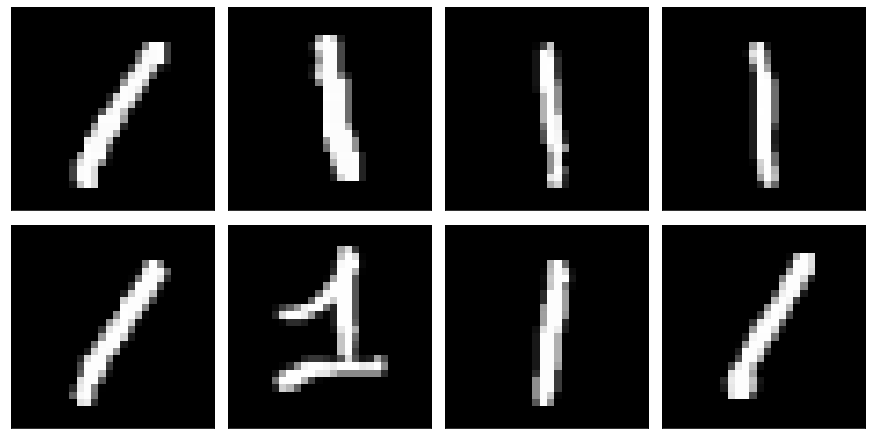

In [46]:
index_data_1 = index_data_0 + 5000
plot_data_grid(x_train, index_data_1, nRow, nCol)

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## linear layer

In [77]:
def layer_linear(input, weight):

    output = np.dot(input,weight.T)

    return output

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## activation function : Sigmoid

In [78]:
def activation_sigmoid(input):

    output = 1 / (1+np.exp(-input))
    return output

In [79]:
print(activation_sigmoid(layer_linear(vector_x_train,weight)))

[0.53044758 0.53468245 0.53573017 ... 0.51238766 0.50928129 0.51976812]


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## compute prediction by the forward propagation of the neural network

In [80]:
def compute_prediction(input, weight):

    output      = layer_linear(input,weight)
    prediction  = activation_sigmoid(output)

    return prediction

In [81]:
print(compute_prediction(vector_x_train,weight))

[0.53044758 0.53468245 0.53573017 ... 0.51238766 0.50928129 0.51976812]


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## compute loss function

In [82]:
def compute_loss(prediction, label):

    loss            = np.sum(-1 * (label * np.log(prediction) + (1-label) * np.log(1-prediction)))
    loss_average    = loss / len(label)

    return loss_average

In [83]:
compute_loss(compute_prediction(vector_x_train,weight),y_train)

0.7136696502112971

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## compute gradient

In [84]:
def compute_gradient(input, prediction, label):

    residual    =  (prediction-label).dot(input)
    gradient    =  residual / len(label)

    return gradient

In [85]:
compute_gradient(vector_x_train,compute_prediction(vector_x_train,weight),y_train)

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.64270909e-05,
        5.22347938e-05,  2.14720104e-05, -5.91214951e-05, -7.77652892e-05,
        3.75296243e-05,  2.42567800e-05,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## compute accuracy

In [86]:
def compute_accuracy(prediction, label):

    threshold   = 0.5
    temp        = [0 if i < threshold else 1 for i in prediction]
    bCorrect    = [True if temp[i]==label[i] else False for i in range(len(label))]
    accuracy    = np.sum(bCorrect) / len(label)

    return accuracy

In [87]:
compute_accuracy(compute_prediction(vector_x_train,weight),y_train)

0.5

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## initialize weight

In [88]:
length_weight   = vector_x_train.shape[1]
weight          = np.ones(length_weight)
weight          = weight * 0.001

print('number of weights: ', length_weight)

number of weights:  784


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## hyper-parameters

In [89]:
number_iteration    = 1000
learning_rate       = 0.1

## variables for optimization information

In [67]:
loss_train_iteration        = np.zeros(number_iteration)
loss_test_iteration         = np.zeros(number_iteration)

accuracy_train_iteration    = np.zeros(number_iteration)
accuracy_test_iteration     = np.zeros(number_iteration)

pred_0_train_mean_iteration = np.zeros(number_iteration) 
pred_0_train_std_iteration  = np.zeros(number_iteration) 
pred_1_train_mean_iteration = np.zeros(number_iteration) 
pred_1_train_std_iteration  = np.zeros(number_iteration) 

pred_0_test_mean_iteration = np.zeros(number_iteration) 
pred_0_test_std_iteration  = np.zeros(number_iteration) 
pred_1_test_mean_iteration = np.zeros(number_iteration) 
pred_1_test_std_iteration  = np.zeros(number_iteration) 

## gradient descent iterations

In [91]:
for i in tqdm(range(number_iteration)):

    prediction_train    = compute_prediction(vector_x_train,weight)
    prediction_test     = compute_prediction(vector_x_test,weight)

    gradient_train      = compute_gradient(vector_x_train,prediction_train,y_train)
    weight              = weight - learning_rate * gradient_train

    prediction_train    = compute_prediction(vector_x_train,weight)
    prediction_test     = compute_prediction(vector_x_test,weight)

    loss_train          = compute_loss(prediction_train,y_train)
    loss_test           = compute_loss(prediction_test,y_test)

    accuracy_train      = compute_accuracy(prediction_train,y_train)
    accuracy_test       = compute_accuracy(prediction_test,y_test)

    pred_train_0    = prediction_train[index_train_0]
    pred_train_1    = prediction_train[index_train_1]

    pred_test_0     = prediction_test[index_test_0]
    pred_test_1     = prediction_test[index_test_1]

    pred_0_train_mean_iteration[i]  = np.mean(pred_train_0)
    pred_0_train_std_iteration[i]   = np.std(pred_train_0)
    pred_1_train_mean_iteration[i]  = np.mean(pred_train_1)
    pred_1_train_std_iteration[i]   = np.std(pred_train_1)

    pred_0_test_mean_iteration[i]   = np.mean(pred_train_0)
    pred_0_test_std_iteration[i]    = np.std(pred_train_0)
    pred_1_test_mean_iteration[i]   = np.mean(pred_train_1)
    pred_1_test_std_iteration[i]    = np.std(pred_train_1)

    loss_train_iteration[i]         = loss_train
    loss_test_iteration[i]          = loss_test

    accuracy_train_iteration[i]     = accuracy_train 
    accuracy_test_iteration[i]      = accuracy_test

100%|██████████| 1000/1000 [00:56<00:00, 17.63it/s]


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## plot curve

In [92]:
def plot_curve(data, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [93]:
def plot_curve2(data1, label_data1, data2, label_data2, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [94]:
def plot_curve_error(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [95]:
def plot_curve_error2(data1_mean, data1_std, data1_label, data2_mean, data2_std, data2_label, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3

    plt.plot(range(len(data1_mean)), data1_mean, '-', color = 'blue', label = data1_label)
    plt.fill_between(range(len(data1_mean)), data1_mean - data1_std, data1_mean + data1_std, facecolor = 'blue', alpha = alpha)

    plt.plot(range(len(data2_mean)), data2_mean, '-', color = 'red', label = data2_label)
    plt.fill_between(range(len(data2_mean)), data2_mean - data2_std, data2_mean + data2_std, facecolor = 'red', alpha = alpha)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

## loss (training) curve

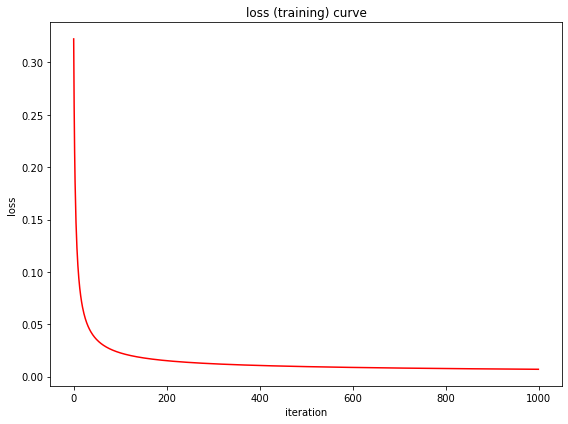

In [96]:
plot_curve(loss_train_iteration, 'iteration', 'loss', 'loss (training) curve')

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## loss (testing) curve

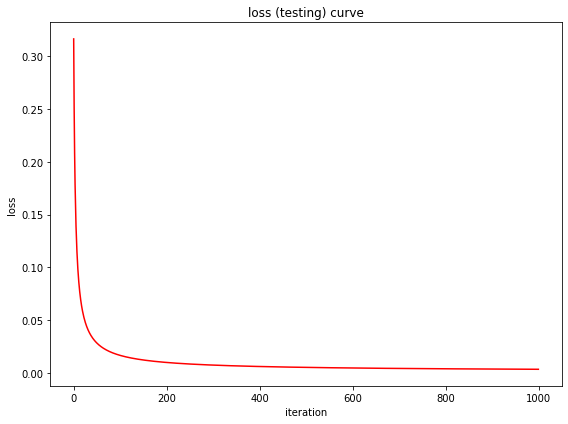

In [97]:
plot_curve(loss_test_iteration, 'iteration', 'loss', 'loss (testing) curve')

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## accuracy (training) curve

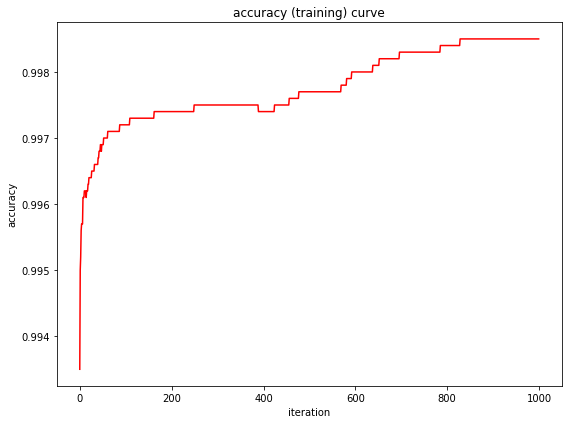

In [98]:
plot_curve(accuracy_train_iteration, 'iteration', 'accuracy', 'accuracy (training) curve')

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## accuracy (testing) curve

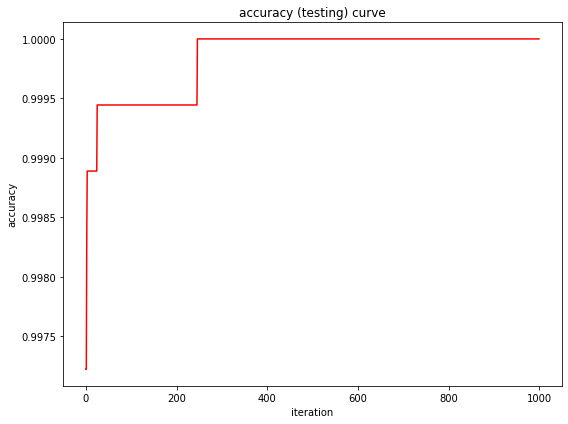

In [99]:
plot_curve(accuracy_test_iteration, 'iteration', 'accuracy', 'accuracy (testing) curve')

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## plot prediction values

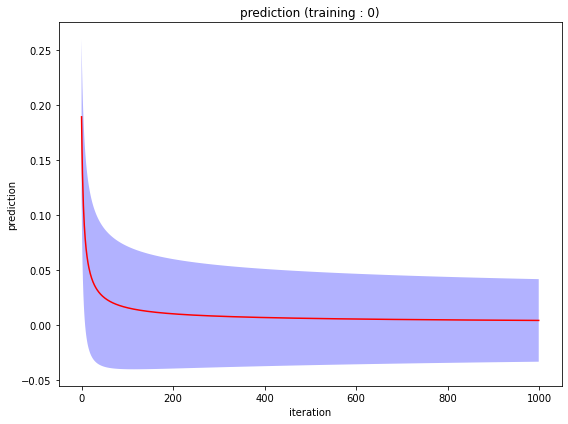

In [100]:
plot_curve_error(pred_0_train_mean_iteration, pred_0_train_std_iteration, 'iteration', 'prediction', 'prediction (training : 0)')

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

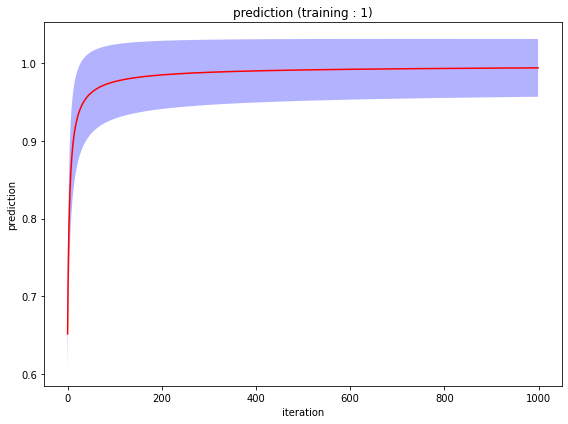

In [101]:
plot_curve_error(pred_1_train_mean_iteration, pred_1_train_std_iteration, 'iteration', 'prediction', 'prediction (training : 1)')

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

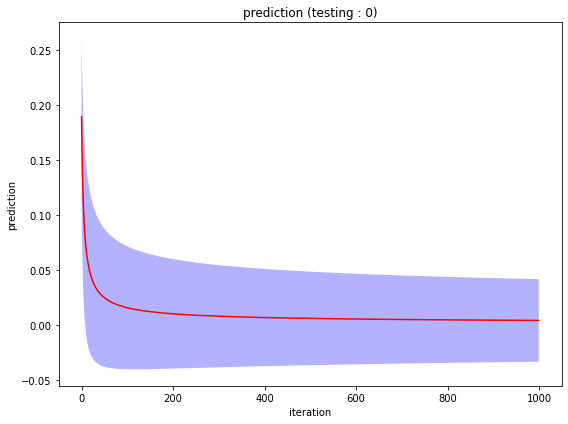

In [102]:
plot_curve_error(pred_0_test_mean_iteration, pred_0_test_std_iteration, 'iteration', 'prediction', 'prediction (testing : 0)')

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

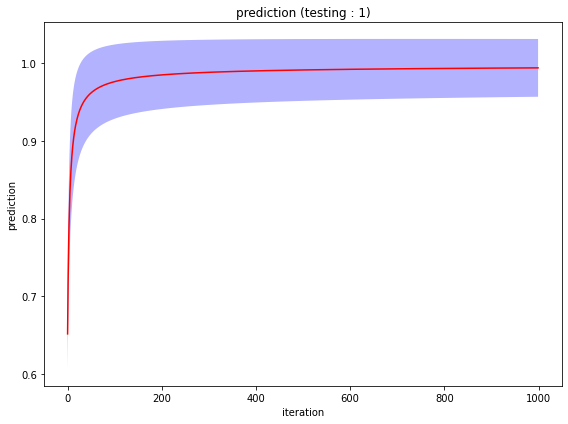

In [103]:
plot_curve_error(pred_1_test_mean_iteration, pred_1_test_std_iteration, 'iteration', 'prediction', 'prediction (testing : 1)')

```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## print values

In [104]:
def print_curve(data, index):

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

## given iterations at which the values are presented

In [105]:
index = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

## training loss

In [107]:
print_curve(loss_train_iteration, index)

index =    0, value = 0.3224725433
index =  100, value = 0.0227201960
index =  200, value = 0.0152430522
index =  300, value = 0.0123042389
index =  400, value = 0.0106603295
index =  500, value = 0.0095824368
index =  600, value = 0.0088081907
index =  700, value = 0.0082180911
index =  800, value = 0.0077492161
index =  900, value = 0.0073649809


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## testing loss

In [108]:
print_curve(loss_test_iteration, index)

index =    0, value = 0.3166153886
index =  100, value = 0.0166185443
index =  200, value = 0.0099116987
index =  300, value = 0.0074171755
index =  400, value = 0.0060858458
index =  500, value = 0.0052494907
index =  600, value = 0.0046723548
index =  700, value = 0.0042489676
index =  800, value = 0.0039247107
index =  900, value = 0.0036683200


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## training accuracy

In [109]:
print_curve(accuracy_train_iteration, index)

index =    0, value = 0.9935000000
index =  100, value = 0.9972000000
index =  200, value = 0.9974000000
index =  300, value = 0.9975000000
index =  400, value = 0.9974000000
index =  500, value = 0.9977000000
index =  600, value = 0.9980000000
index =  700, value = 0.9983000000
index =  800, value = 0.9984000000
index =  900, value = 0.9985000000


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## testing accuracy

In [110]:
print_curve(accuracy_test_iteration, index)

index =    0, value = 0.9972222222
index =  100, value = 0.9994444444
index =  200, value = 0.9994444444
index =  300, value = 1.0000000000
index =  400, value = 1.0000000000
index =  500, value = 1.0000000000
index =  600, value = 1.0000000000
index =  700, value = 1.0000000000
index =  800, value = 1.0000000000
index =  900, value = 1.0000000000


```console

$ git commit -m "YOUR MESSAGE" assignment_03.ipynb

```

## functions for presenting the results

In [117]:
def function_results_01(data,nRow,nCol):
    nPlot      = nRow * nCol
    index_data = np.array(range(nPlot))
    fig, axes  = plt.subplots(nRow,nCol,constrained_layout=True,figsize=(nCol*3,nRow*3))

    for i in range(nRow):
        for j in range(nCol):

            k     = i * nCol + j
            index = index_data[k]

            axes[i,j].imshow(data[index],cmap='gray',vmin=0,vmax=1)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
    plt.show() 

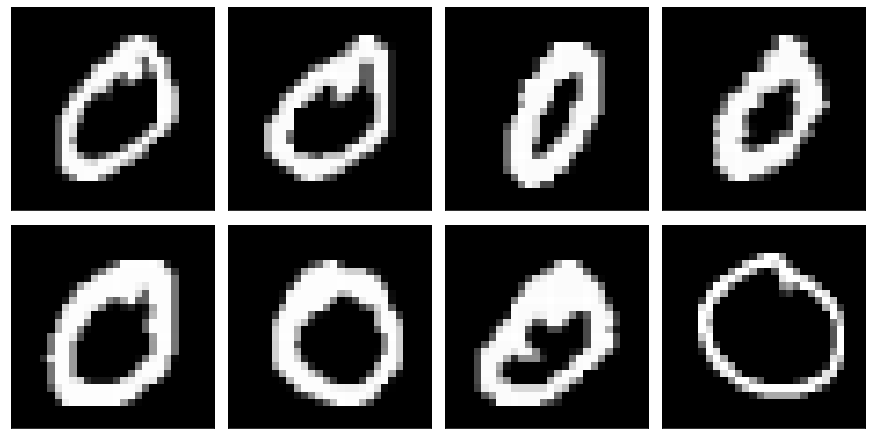

In [118]:
function_results_01(x_train,2,4)

In [119]:
def function_results_02(data,nRow,nCol):
    nPlot      = nRow * nCol
    index_data = np.array(range(nPlot))
    index_data = index_data + 5000
    fig, axes  = plt.subplots(nRow,nCol,constrained_layout=True,figsize=(nCol*3,nRow*3))

    for i in range(nRow):
        for j in range(nCol):

            k     = i * nCol + j
            index = index_data[k]

            axes[i,j].imshow(data[index],cmap='gray',vmin=0,vmax=1)
            axes[i,j].xaxis.set_visible(False)
            axes[i,j].yaxis.set_visible(False)
    plt.show()

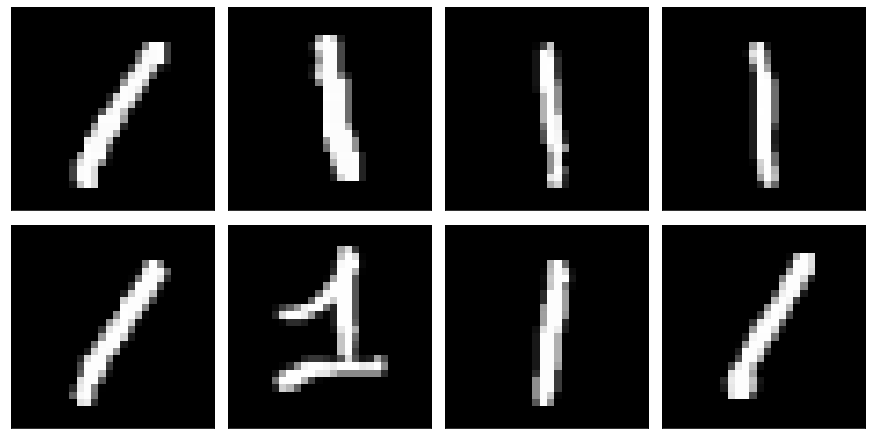

In [124]:
function_results_02(x_train,nRow=2,nCol=4)

In [125]:
def function_results_03():
    plot_curve(loss_train_iteration, 'iteration', 'loss', 'loss (training) curve')

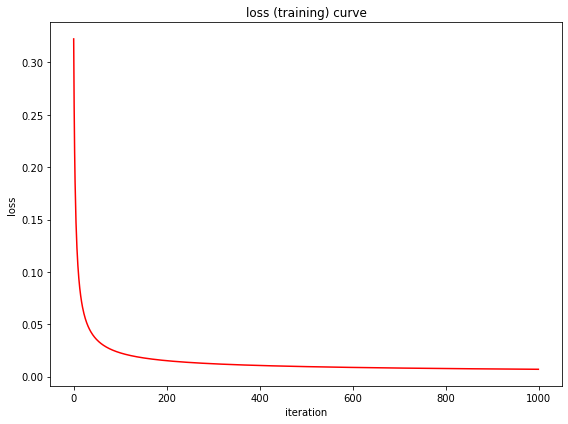

In [126]:
function_results_03()

In [127]:
def function_results_04():
    plot_curve(loss_test_iteration, 'iteration', 'loss', 'loss (testing) curve')

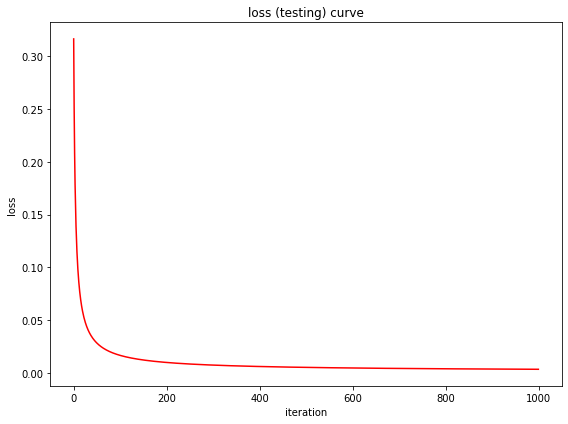

In [128]:
function_results_04()

In [129]:
def function_results_05():
    plot_curve(accuracy_train_iteration, 'iteration', 'accuracy', 'accuracy (training) curve')

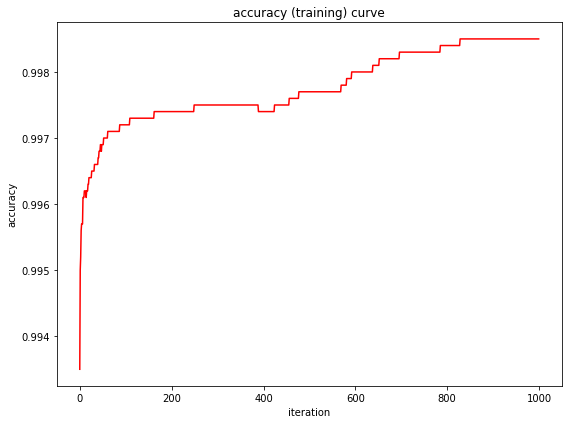

In [130]:
function_results_05()

In [131]:
def function_results_06():
    plot_curve(accuracy_test_iteration, 'iteration', 'accuracy', 'accuracy (testing) curve')

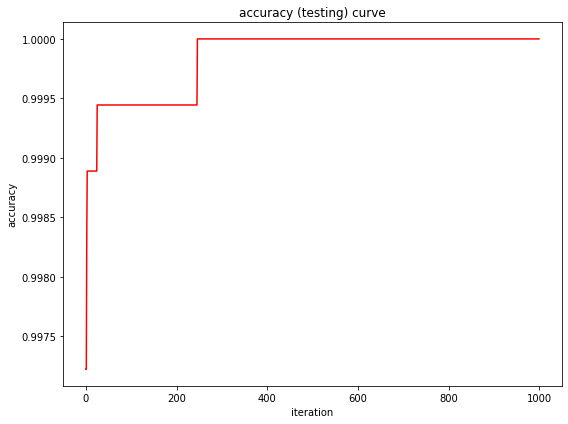

In [132]:
function_results_06()

In [133]:
def function_results_07():
    plot_curve_error(pred_0_train_mean_iteration, pred_0_train_std_iteration, 'iteration', 'prediction', 'prediction (training : 0)')

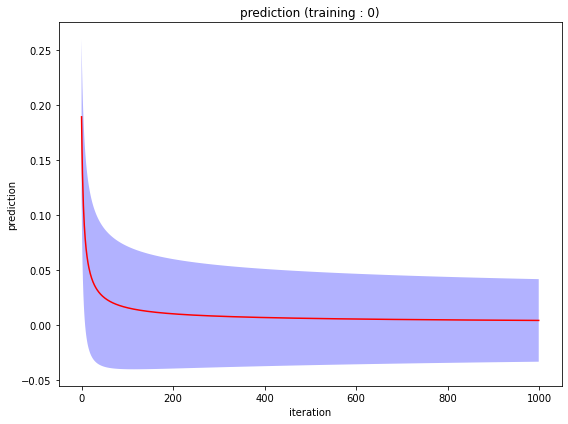

In [135]:
function_results_07()

In [136]:
def function_results_08():
    plot_curve_error(pred_1_train_mean_iteration, pred_1_train_std_iteration, 'iteration', 'prediction', 'prediction (training : 1)')


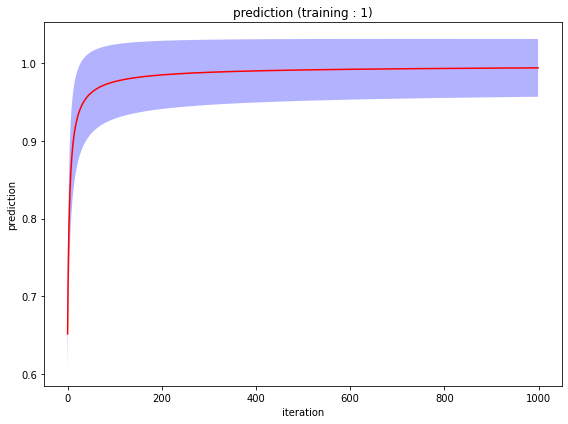

In [137]:
function_results_08()

In [138]:
def function_results_09():
    plot_curve_error(pred_0_test_mean_iteration, pred_0_test_std_iteration, 'iteration', 'prediction', 'prediction (testing : 0)')

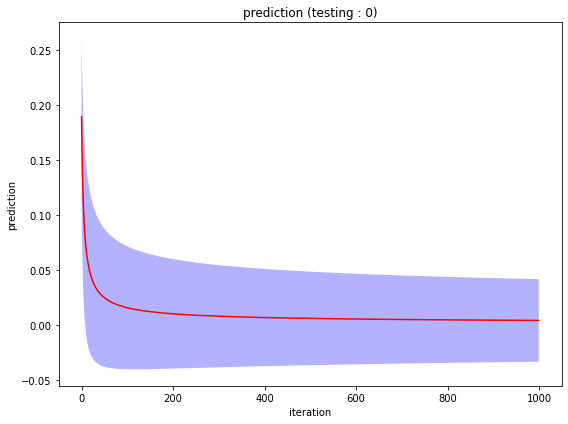

In [139]:
function_results_09()

In [140]:
def function_results_10():
    plot_curve_error(pred_1_test_mean_iteration, pred_1_test_std_iteration, 'iteration', 'prediction', 'prediction (testing : 1)')

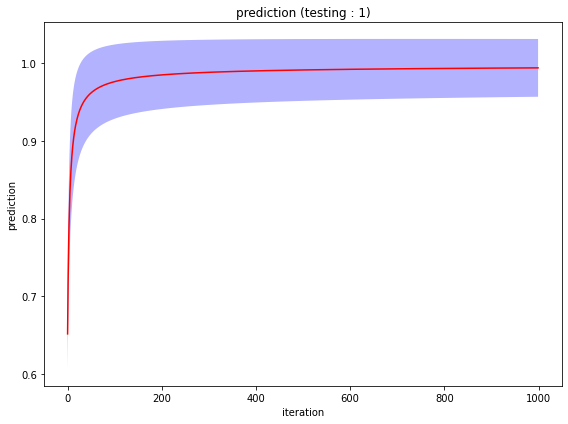

In [141]:
function_results_10()

In [142]:
def function_results_11(data):
    
    index = np.array([0,100,200,300,400,500,600,700,800,900])

    for idx in index:
        val = data[idx]
        print('index = %4d, value = %12.10f' % (idx, val))

In [143]:
function_results_11(loss_train_iteration)

index =    0, value = 0.3224725433
index =  100, value = 0.0227201960
index =  200, value = 0.0152430522
index =  300, value = 0.0123042389
index =  400, value = 0.0106603295
index =  500, value = 0.0095824368
index =  600, value = 0.0088081907
index =  700, value = 0.0082180911
index =  800, value = 0.0077492161
index =  900, value = 0.0073649809


In [144]:
def function_results_12(data):
    
    index = np.array([0,100,200,300,400,500,600,700,800,900])

    for idx in index:
        val = data[idx]
        print('index = %4d, value = %12.10f' % (idx, val))

In [145]:
function_results_12(loss_test_iteration)

index =    0, value = 0.3166153886
index =  100, value = 0.0166185443
index =  200, value = 0.0099116987
index =  300, value = 0.0074171755
index =  400, value = 0.0060858458
index =  500, value = 0.0052494907
index =  600, value = 0.0046723548
index =  700, value = 0.0042489676
index =  800, value = 0.0039247107
index =  900, value = 0.0036683200


In [146]:
def function_results_13(data):
    
    index = np.array([0,100,200,300,400,500,600,700,800,900])

    for idx in index:
        val = data[idx]
        print('index = %4d, value = %12.10f' % (idx, val))

In [147]:
function_results_13(accuracy_train_iteration)

index =    0, value = 0.9935000000
index =  100, value = 0.9972000000
index =  200, value = 0.9974000000
index =  300, value = 0.9975000000
index =  400, value = 0.9974000000
index =  500, value = 0.9977000000
index =  600, value = 0.9980000000
index =  700, value = 0.9983000000
index =  800, value = 0.9984000000
index =  900, value = 0.9985000000


In [148]:
def function_results_14(data):
        
    index = np.array([0,100,200,300,400,500,600,700,800,900])

    for idx in index:
        val = data[idx]
        print('index = %4d, value = %12.10f' % (idx, val))

In [149]:
function_results_14(accuracy_test_iteration)

index =    0, value = 0.9972222222
index =  100, value = 0.9994444444
index =  200, value = 0.9994444444
index =  300, value = 1.0000000000
index =  400, value = 1.0000000000
index =  500, value = 1.0000000000
index =  600, value = 1.0000000000
index =  700, value = 1.0000000000
index =  800, value = 1.0000000000
index =  900, value = 1.0000000000


---

# RESULTS

---

## # 01. plot examples of the input training images for '0'

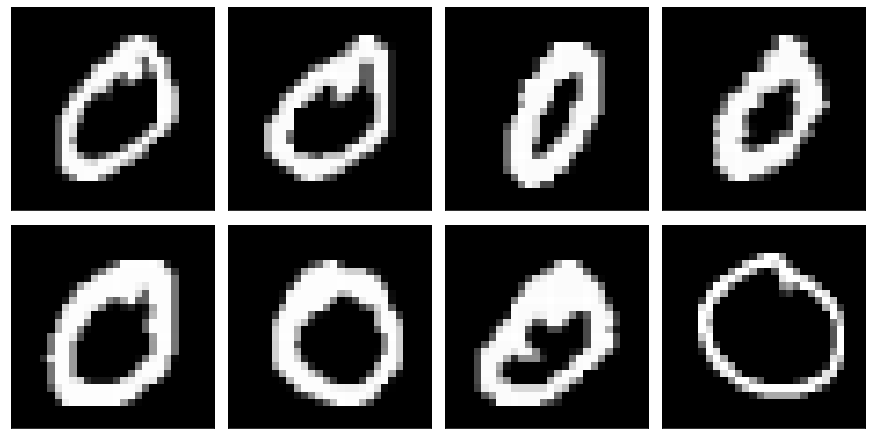

In [150]:
function_results_01(x_train,2,4)

## # 02. plot examples of the input training images for '1'

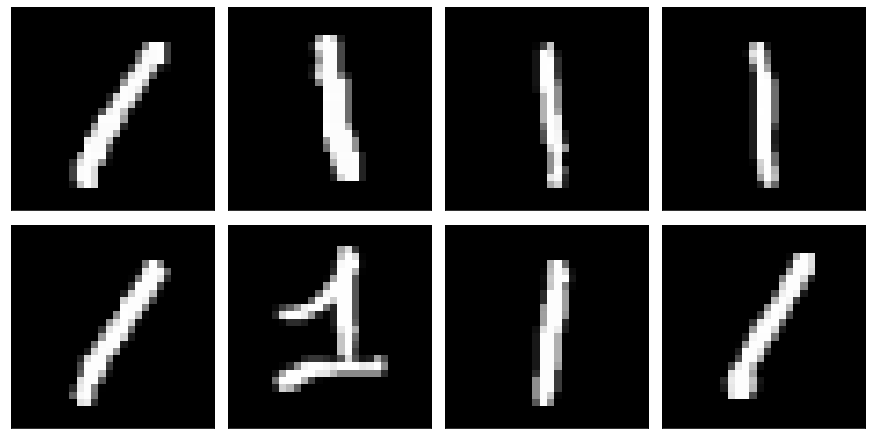

In [151]:
function_results_02(x_train,2,4)

## # 03. plot the training loss curve (x-axis: iteration, y-axis: loss)

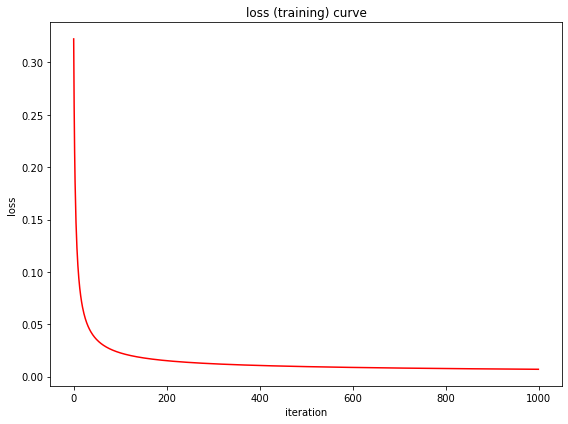

In [152]:
function_results_03()

## # 04. plot the testing loss curve (x-axis: iteration, y-axis: loss)

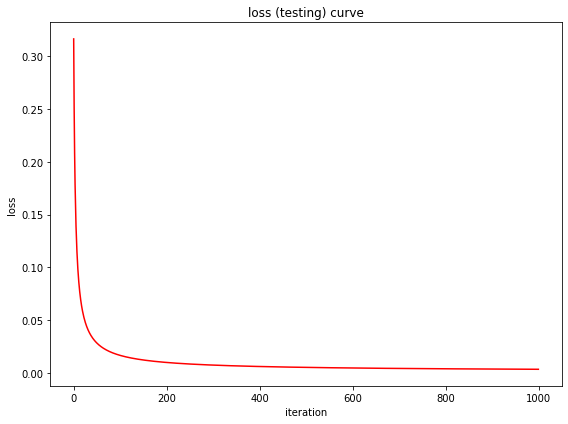

In [153]:
function_results_04()

## # 05. plot the training accuracy curve (x-axis: iteration, y-axis: accuracy)

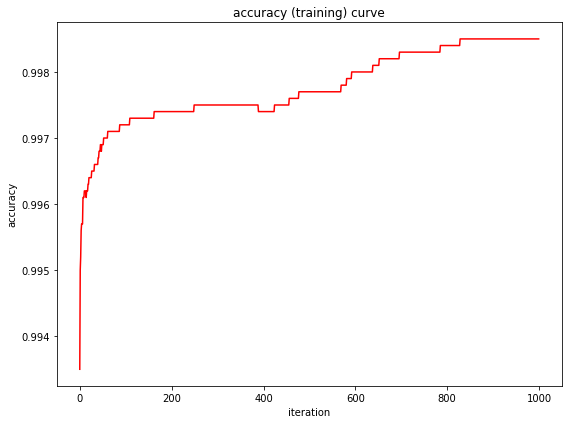

In [154]:
function_results_05()

## # 06. plot the testing accuracy curve (x-axis: iteration, y-axis: accuracy)

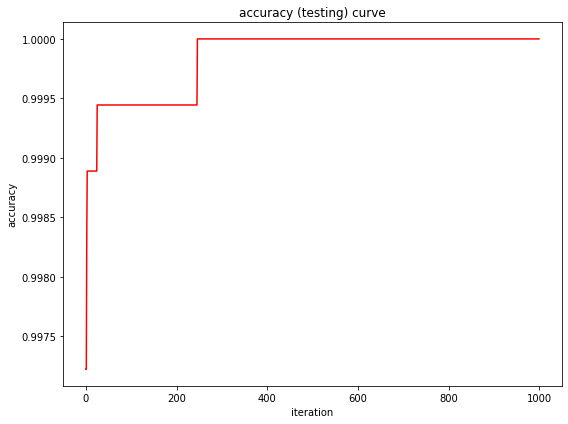

In [155]:
function_results_06()

## # 07. plot the training prediction curve (mean and std) for image 0 (x-axis: iteration, y-axis: prediction)

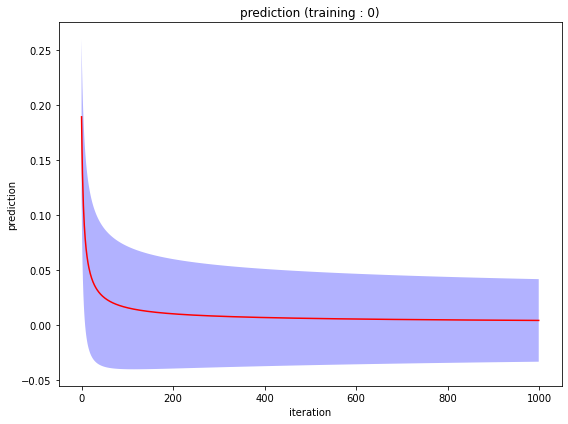

In [156]:
function_results_07()

## # 08. plot the training prediction curve (mean and std) for image 1 (x-axis: iteration, y-axis: prediction)

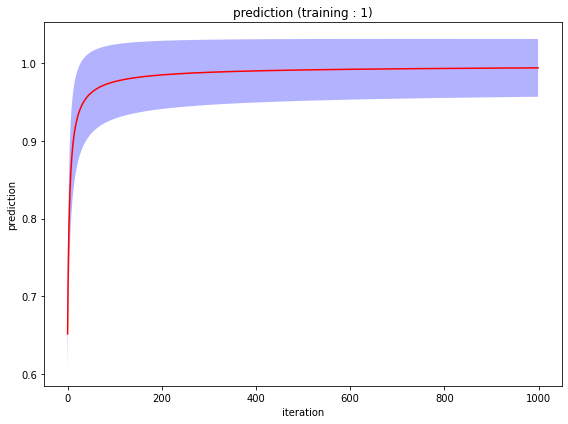

In [157]:
function_results_08()

## # 09. plot the testing prediction curve (mean and std) for image 0 (x-axis: iteration, y-axis: prediction)

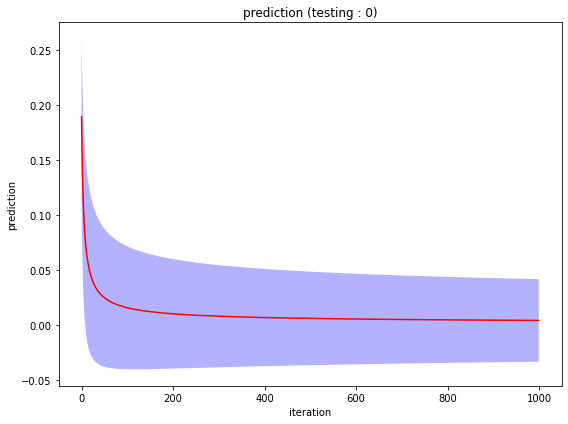

In [158]:
function_results_09()

## # 10. plot the testing prediction curve (mean and std) for image 1 (x-axis: iteration, y-axis: prediction)

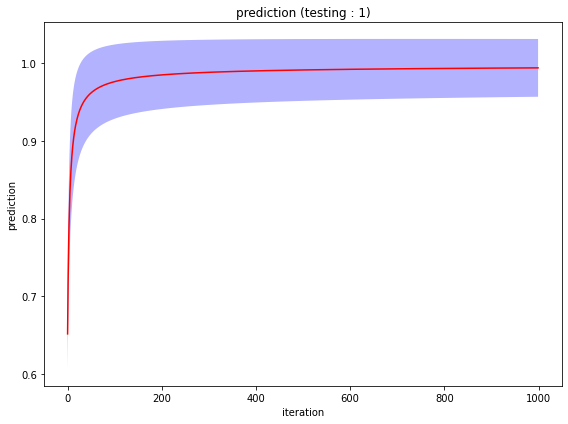

In [159]:
function_results_10()

## # 11. print the training loss at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [160]:
function_results_11(loss_train_iteration)

index =    0, value = 0.3224725433
index =  100, value = 0.0227201960
index =  200, value = 0.0152430522
index =  300, value = 0.0123042389
index =  400, value = 0.0106603295
index =  500, value = 0.0095824368
index =  600, value = 0.0088081907
index =  700, value = 0.0082180911
index =  800, value = 0.0077492161
index =  900, value = 0.0073649809


## # 12. print the testing loss at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [161]:
function_results_12(loss_test_iteration)

index =    0, value = 0.3166153886
index =  100, value = 0.0166185443
index =  200, value = 0.0099116987
index =  300, value = 0.0074171755
index =  400, value = 0.0060858458
index =  500, value = 0.0052494907
index =  600, value = 0.0046723548
index =  700, value = 0.0042489676
index =  800, value = 0.0039247107
index =  900, value = 0.0036683200


## # 13. print the training accuracy at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [162]:
function_results_13(accuracy_train_iteration)

index =    0, value = 0.9935000000
index =  100, value = 0.9972000000
index =  200, value = 0.9974000000
index =  300, value = 0.9975000000
index =  400, value = 0.9974000000
index =  500, value = 0.9977000000
index =  600, value = 0.9980000000
index =  700, value = 0.9983000000
index =  800, value = 0.9984000000
index =  900, value = 0.9985000000


## # 14. print the testing accuracy at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900

In [163]:
function_results_14(accuracy_test_iteration)

index =    0, value = 0.9972222222
index =  100, value = 0.9994444444
index =  200, value = 0.9994444444
index =  300, value = 1.0000000000
index =  400, value = 1.0000000000
index =  500, value = 1.0000000000
index =  600, value = 1.0000000000
index =  700, value = 1.0000000000
index =  800, value = 1.0000000000
index =  900, value = 1.0000000000
